In [30]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import *
get_ipython().magic(u'matplotlib inline')

In [31]:
#excentricidades,inclinacion
e1=0.1
e2=0.0
i=10*(np.pi/180.0)
#semiejes 1
a1=2.75
b1=a1*(1-e1**2)**(0.5)
#semiejes 2
a2=3.0
b2=a2*(1-e2**2)**(0.5)
#distancia focal C
c1=a1*e1
#y=(1.0-(a2/a1)**2)/((1/b1)**2-(1/a1)**2)
#print y
print a1,b1
print a2,b2
print c1

2.75 2.73621545204
3.0 3.0
0.275


(-2, 2)

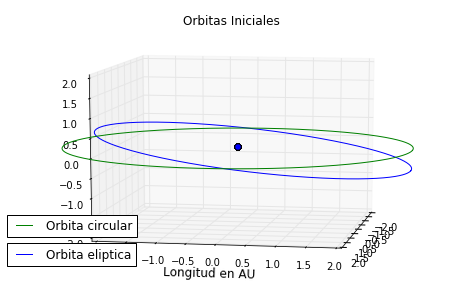

In [32]:
fig = plt.figure()
ax = Axes3D(fig)
f=np.arange(0,2*np.pi,0.01)
#los valores de y1,z1 se deben rotar en un angulo i, x1 solo se traslada
#c coloca el foco de la elipse en el centro del circulo
x1=b1*np.sin(f)
y1=np.cos(i)*(c1+a1*np.cos(f))
z1=-np.sin(i)*(c1+a1*np.cos(f))
#los valores de x2,y2 no son rotados n trasladados
x2=b2*np.sin(f)
y2=a2*np.cos(f)
#x3 y y3 son solo para mostrar el centro del circulo
x3=0*np.cos(f)
y3=0*np.sin(f)
#grafica
p1,=ax.plot(x1,y1,z1,'b')
p2,=ax.plot(x2,y2,'g')
plt.plot(x3,y3,'bo')
#plt.plot(x3,y3-c1,'bo')
ax.view_init(elev=10,azim=10)#permite modificar el angulo para ver el grafico
plt.title('Orbitas Iniciales')
plt.ylabel('Longitud en AU',fontsize=12)
l1=plt.legend([p1],['Orbita eliptica'],loc=(-0.02,0.1))
l2=plt.legend([p2],['Orbita circular'],loc=(-0.02,0.2))
plt.gca().add_artist(l1)
#limites de los ejes
ext=2
ax.set_xlim((-ext,ext))
ax.set_ylim((-ext,ext))
ax.set_zlim((-ext,ext))

In [33]:
#unidades canomicas
G=6.67e-11 #en m^3/kg*s^2
ul=1.49e+11 #en metros
um=1.99e+30 #en kg
mast=5.025125*10**(-13.)#masa del asteroide en um
ut=(ul**3/(G*um))**0.5 #en seg
print 'ut =',ut

ut = 4992176.68264


In [34]:
#anomalia verdadera al momento del impacto
#xp=2.775023
#yp=1.139844935
#yp=b1*(1-(((xp-c)**2)/a1**2))**0.5
#rp=(xp**2+yp**2)**0.5
rp=3.0
cosf=(-1*c1*np.cos(i))/(a1*np.cos(i)-a2)
fp=np.arccos(cosf)
#Velocidad y radio finales
vfy=0.5*((1/b2**0.5)+(np.cos(i)/b1**0.5))#choque en la misma direccion
vfk=-0.5*np.sin(i)/b1**0.5
#vfy=0.5*((1/b2**0.5)-(np.cos(i)/b1**0.5))#choque con direccion opuesta 
#vfk=0.5*np.sin(i)/b1**0.5
vf=np.array([0,vfy,vfk])
rfx=rp*np.cos(fp)
rfy=rp*np.sin(fp)
rf=np.array([rfx,rfy,0])
print 'vf =',vf
print 'rf =',rf
print 'La velocidad final es vf =',np.linalg.norm(vf)
print 'fp =',fp*(180/np.pi)
#print 'rp =',rp

vf = [ 0.          0.58635285 -0.05248861]
rf = [ 2.78452969  1.11642034  0.        ]
La velocidad final es vf = 0.588697472491
fp = 21.8476643899


In [35]:
#elementos fisicos de la orbita
mu=1.0 #parametro gravitacional en unidades canonicas
iu=np.array([1,0,0])#vectores unitarios
j=np.array([0,1,0])
k=np.array([0,0,1])
h=cross(rf,vf)#momento angular especifico
n=cross(k,h)#vector nodal
#Vector de Laplace-Runge-Lenz
A1=cross(vf,h)
A2=rf/3.0
A=A1-mu*A2
#Vector de excentricidad y semilatus rectum
e=A/mu
p=np.linalg.norm(h)**2/mu
print 'h =',h
print 'n =',n
print 'e =',e
print 'La magnitud de h es = ',np.linalg.norm(h)
print 'La excentricidad es ',np.linalg.norm(e)
print 'El semilatus rectum es',p

h = [-0.05859935  0.1461561   1.63271691]
n = [-0.1461561  -0.05859935  0.        ]
e = [ 0.03684317 -0.36906432  0.0343599 ]
La magnitud de h es =  1.64029265605
La excentricidad es  0.372486900913
El semilatus rectum es 2.6905599975


In [36]:
#elementos orbitales
inc=(np.arccos(np.dot(h,k)/np.linalg.norm(h))) #inclinacion
omega=2*np.pi-arccos((np.dot(n,iu))/(np.linalg.norm(n)))#Longitud del nodo asc,  n.j<0.0
w=np.arccos(np.dot(n,e)/(np.linalg.norm(n)*np.linalg.norm(e)))#arg periapsis
print 'La inclinacion es i =',inc*(180/np.pi)
print 'La Longitud del nodo asc es omega =',omega*(180/np.pi)
print 'El argumento del periapsis es w =',w*(180/np.pi)

La inclinacion es i = 5.50879940185
La Longitud del nodo asc es omega = 201.84766439
El argumento del periapsis es w = 73.9239186456


In [37]:
#matrices de rotacion
rot1=np.array([[np.cos(omega),-np.sin(omega),0.0],
             [np.sin(omega),np.cos(omega),0.0],
             [0.0,0.0,1.0]])
rot2=np.array([[1.0,0.0,0.0],
               [0.0,np.cos(inc),np.sin(inc)],
               [0.0,-np.sin(inc),np.cos(inc)]])
rot3=np.array([[np.cos(w),np.sin(w),0.0],
             [-np.sin(w),np.cos(w),0.0],
             [0.0,0.0,1.0]])
print rot1
print rot2
print rot3

[[-0.92817656  0.37214011  0.        ]
 [-0.37214011 -0.92817656  0.        ]
 [ 0.          0.          1.        ]]
[[ 1.          0.          0.        ]
 [ 0.          0.99538147  0.09599862]
 [ 0.         -0.09599862  0.99538147]]
[[ 0.27691354  0.96089484  0.        ]
 [-0.96089484  0.27691354  0.        ]
 [ 0.          0.          1.        ]]


In [38]:
a=p/(1-np.linalg.norm(e)**2)
b=a*(1-np.linalg.norm(e)**2)**0.5
c=a*np.linalg.norm(e)
print 'a =',a
print 'b =',b
print 'c =',c

a = 3.12400468675
b = 2.89919334335
c = 1.1636508242


In [39]:
#elementos para el frafico
f2=np.arange(0,2*np.pi,0.01)
x=b*np.sin(f2)+c
y=a*np.cos(f2)
z=0.0
r=[x,y,z]
rot_final=(rot3.dot(rot2)).dot(rot1)
xf=rot_final[0,0]*r[0]+rot_final[0,1]*r[1]+rot_final[0,2]*r[2]
yf=rot_final[1,0]*r[0]+rot_final[1,1]*r[1]+rot_final[1,2]*r[2]
zf=rot_final[2,0]*r[0]+rot_final[2,1]*r[1]+rot_final[2,2]*r[2]
#para modificar el tamaño de los ejes se usa h1t,e1t,n1t,i1t,j1t,k1t
#grafica de h
t=np.arange(0,0.3,0.01)
h1t=8
h1=h1t*t*h[0]
h2=h1t*t*h[1]
h3=h1t*t*h[2]
#grafica de el tamaño de los ejes
t1=np.arange(0,0.5,0.01)
e1t=10.5
e1=e1t*t1*e[0]
e2=e1t*t1*e[1]
e3=e1t*t1*e[2]
#grafica vector nodal
t2=np.arange(-1.7,2,0.01)
n2t=15
n1=n2t*t2*n[0]
n2=n2t*t2*n[1]
n3=n2t*t2*n[2]
#plano de referencia
t3=np.arange(0,0.3,0.01)
i1t=15
i1=i1t*t3*iu[0]
i2=i1t*t3*iu[1]
i3=i1t*t3*iu[2]
j1t=5
j1=j1t*t3*j[0]
j2=j1t*t3*j[1]
j3=j1t*t3*j[2]
k1t=7
k1=k1t*t3*k[0]
k2=k1t*t3*k[1]
k3=k1t*t3*k[2]
print rot_final
#print rot_final[2,1]

[[-0.61296065 -0.78471025  0.09224458]
 [ 0.78930537 -0.6134251   0.02658332]
 [ 0.03572494  0.08910367  0.99538147]]


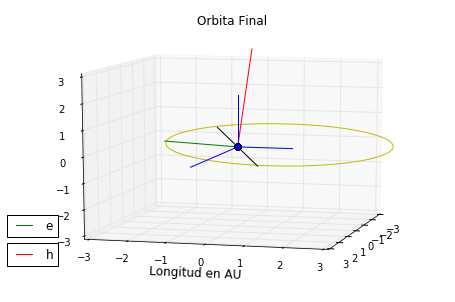

In [40]:
#grafico
fig = plt.figure()
ax = Axes3D(fig)
#grafica elementos fisicos y orbita
ax.plot(xf,yf,zf,'y')
p11,=ax.plot(h1,h2,h3,'r')
p22,=ax.plot(e1,e2,e3,'g')
p33,=ax.plot(n1,n2,n3,'black')
#grafica ejes de referencia x,y,z y centro
ax.plot(i1,i2,i3,'b')
ax.plot(j1,j2,j3,'b')
ax.plot(k1,k2,k3,'b')
plt.plot(x3,y3,'bo')
#arreglos
ax.view_init(elev=10,azim=15)
ext=3
ax.set_xlim((-ext,ext))
ax.set_ylim((-ext,ext))
ax.set_zlim((-ext,ext))
plt.title('Orbita Final')
plt.ylabel('Longitud en AU',fontsize=12)
l1=plt.legend([p11],['h'],loc=(-0.02,0.1))
l2=plt.legend([p22],['e'],loc=(-0.02,0.2))
plt.gca().add_artist(l1)

In [41]:
#energia del sistema

In [46]:
mast=10**18/um
e_acre=0.5*2.0*mast*np.linalg.norm(vf)**2.
e_m1=0.5*mast*(1.0*1.0/b1)
e_m2=0.5*mast*(1.0*1.0/b2)
e_dis=e_acre-e_m1-e_m2
Q=(1./(2*(mast/2))*(0.5*mast*np.linalg.norm(vf)**2.))#tengo dudas con este termino
   
print 'La energia de 1 es E1 =',e_m1
print 'La energia 2 es E2 =',e_m2
print 'La energia de M es Em =',e_acre
print 'La energia disipada es E =',e_dis
print 'La energia especifica es Q =',Q

La energia de 1 es E1 = 9.18262051402e-14
La energia 2 es E2 = 8.37520938023e-14
La energia de M es Em = 1.74153122672e-13
La energia disipada es E = -1.42517627033e-15
La energia especifica es Q = 0.173282357059
